# (Dataset Exploration Title)
## by (Sami Adham)

## Preliminary Wrangling

> Briefly introduce your dataset here.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os

%matplotlib inline

# Data Wrangling
## Gathering Data

In [2]:
#Download all files in from website then extract and join files data in one master file
#path=r'Files'
#files=glob.glob(os.path.join(path,'*.csv'))
#df_file=pd.concat((pd.read_csv(f) for f in files),ignore_index=True)
#df_file.to_csv('master_file.csv',index=False)

In [3]:
df=pd.read_csv('master_file.csv')
df.head(10)
base_color=sns.color_palette()[0]

## Assessing


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 16 columns):
duration_sec               int64
start_time                 object
end_time                   object
start_station_id           float64
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    int64
user_type                  object
member_birth_year          float64
member_gender              object
bike_share_for_all_trip    object
dtypes: float64(7), int64(2), object(7)
memory usage: 227.5+ MB


In [5]:
df.duplicated().sum()

0

In [6]:
df.shape

(1863721, 16)

In [7]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,1.863721e+06,1.851950e+06,1.863721e+06,1.863721e+06,1.851950e+06,1.863721e+06,1.863721e+06,1.863721e+06,1.753003e+06
mean,8.573026e+02,1.196744e+02,3.776678e+01,-1.223492e+02,1.181730e+02,3.776690e+01,-1.223487e+02,2.296851e+03,1.983088e+03
std,2.370379e+03,1.003976e+02,1.057689e-01,1.654634e-01,1.004403e+02,1.056483e-01,1.650597e-01,1.287733e+03,1.044289e+01
min,6.100000e+01,3.000000e+00,3.726331e+01,-1.224737e+02,3.000000e+00,3.726331e+01,-1.224737e+02,1.100000e+01,1.881000e+03
25%,3.500000e+02,3.300000e+01,3.777106e+01,-1.224114e+02,3.000000e+01,3.777106e+01,-1.224094e+02,1.225000e+03,1.978000e+03
50%,5.560000e+02,8.900000e+01,3.778107e+01,-1.223974e+02,8.800000e+01,3.778127e+01,-1.223971e+02,2.338000e+03,1.985000e+03
75%,8.720000e+02,1.860000e+02,3.779625e+01,-1.222865e+02,1.830000e+02,3.779728e+01,-1.222894e+02,3.333000e+03,1.991000e+03
max,8.636600e+04,3.810000e+02,4.551000e+01,-7.357000e+01,3.810000e+02,4.551000e+01,-7.357000e+01,6.234000e+03,2.000000e+03


In [8]:
df.nunique()

duration_sec                 16709
start_time                 1863584
end_time                   1863610
start_station_id               331
start_station_name             348
start_station_latitude         369
start_station_longitude        370
end_station_id                 331
end_station_name               348
end_station_latitude           370
end_station_longitude          371
bike_id                       5054
user_type                        2
member_birth_year               86
member_gender                    3
bike_share_for_all_trip          2
dtype: int64

In [9]:
df['member_gender'].value_counts()

Male      1288085
Female     438188
Other       27081
Name: member_gender, dtype: int64

#### Quality  Issues 

1. Time should be in timestamp dtype such as ['start_time','end_time']
2. fix gender names
3. Gender,user type can be Category data type
3. Calculate Age column to dataset
4. Rename featurs to easy name 
5. Add featurs such as week day, hour, day , month,year

## Cleaning
    Before any Cleaning we should take a copy of exiting dataset

In [10]:
# Copy data
clean_df=df.copy()

__Define__

    Quality Issue 1 :Time should be in timestamp dype such as ['start_time','end_time']
    Quality Issue 2 :Gender,user type can be Category data type

__Code__

In [11]:
clean_df['member_gender'].value_counts()

Male      1288085
Female     438188
Other       27081
Name: member_gender, dtype: int64

In [12]:
#Convert Time to datastamp
clean_df['start_time']=pd.to_datetime(clean_df['start_time'])
clean_df['end_time']=pd.to_datetime(clean_df['end_time'])

#Convert Gender and user Type to catagory
clean_df['member_gender']=clean_df['member_gender'].astype('category')
clean_df['user_type']=clean_df['user_type'].astype('category')

__Test__

In [13]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 16 columns):
duration_sec               int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id           float64
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    int64
user_type                  category
member_birth_year          float64
member_gender              category
bike_share_for_all_trip    object
dtypes: category(2), datetime64[ns](2), float64(7), int64(2), object(3)
memory usage: 202.6+ MB


__Define__

    Quality Issue 3 :Calculate Age column to dataset

__Code__

In [14]:
#Add Age column by using member birth year
clean_df['age']=2019-clean_df['member_birth_year']

#### Test

In [15]:
clean_df.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age
1124557,408,2018-07-17 17:03:23.380,2018-07-17 17:10:11.821,19.0,Post St at Kearny St,37.788975,-122.403452,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,24,Customer,1991.0,Male,No,28.0
464925,792,2018-06-25 17:59:13.753,2018-06-25 18:12:26.468,176.0,MacArthur BART Station,37.828410,-122.266315,203.0,Webster St at 2nd St,37.795195,-122.273970,3489,Subscriber,1970.0,Male,No,49.0
1446850,288,2018-10-27 15:05:54.657,2018-10-27 15:10:43.118,78.0,Folsom St at 9th St,37.773717,-122.411647,76.0,McCoppin St at Valencia St,37.771662,-122.422423,667,Subscriber,1983.0,Male,No,36.0
1450861,1153,2018-10-26 17:15:05.114,2018-10-26 17:34:19.073,17.0,Embarcadero BART Station (Beale St at Market St),37.792251,-122.397086,355.0,23rd St at Tennessee St,37.755367,-122.388795,1626,Subscriber,1991.0,Male,No,28.0
525711,2702,2018-06-15 19:15:18.809,2018-06-15 20:00:21.684,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,3792,Subscriber,1961.0,Male,No,58.0


In [16]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 17 columns):
duration_sec               int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id           float64
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    int64
user_type                  category
member_birth_year          float64
member_gender              category
bike_share_for_all_trip    object
age                        float64
dtypes: category(2), datetime64[ns](2), float64(8), int64(2), object(3)
memory usage: 216.8+ MB


__Define__

    Quality Issue 4 :Rename featurs to easy name 

__Code__

In [17]:
rename_column={'start_time':'start_timestamp','end_time':'end_timestamp','member_birth_year':'year_birth','member_gender':'gender'}
clean_df=clean_df.rename(columns=rename_column)

#### Test

In [18]:
clean_df.sample(10)

,duration_sec,start_timestamp,end_timestamp,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,year_birth,gender,bike_share_for_all_trip,age
1840953,642,2018-04-06 08:48:17.013,2018-04-06 08:58:59.336,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,182.0,19th Street BART Station,37.809013,-122.268247,130,Subscriber,1987.0,Female,No,32.0
678020,566,2018-05-22 11:23:57.901,2018-05-22 11:33:24.797,76.0,McCoppin St at Valencia St,37.771662,-122.422423,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,1645,Subscriber,1978.0,Female,No,41.0
1776592,1375,2018-04-22 13:30:29.777,2018-04-22 13:53:24.847,73.0,Pierce St at Haight St,37.771793,-122.433708,13.0,Commercial St at Montgomery St,37.794231,-122.402923,1127,Subscriber,1987.0,Female,No,32.0
379478,862,2018-09-09 21:33:30.952,2018-09-09 21:47:53.071,357.0,2nd St at Julian St,37.341132,-121.892844,296.0,5th St at Virginia St,37.325998,-121.877120,1070,Subscriber,1993.0,Male,Yes,26.0
681116,292,2018-05-21 19:31:27.818,2018-05-21 19:36:19.870,251.0,California St at University Ave,37.870555,-122.279720,246.0,Berkeley Civic Center,37.869060,-122.270556,2505,Subscriber,1980.0,Male,No,39.0
101805,368,2018-02-02 06:52:12.518,2018-02-02 06:58:21.141,115.0,Jackson Playground,37.765026,-122.398773,130.0,22nd St Caltrain Station,37.757369,-122.392057,2690,Subscriber,1989.0,Male,No,30.0
912903,562,2018-12-05 18:46:19.815,2018-12-05 18:55:42.509,121.0,Mission Playground,37.759210,-122.421339,95.0,Sanchez St at 15th St,37.766219,-122.431060,1445,Subscriber,1974.0,Male,No,45.0
1829577,1084,2018-04-09 20:17:53.166,2018-04-09 20:35:58.144,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,3497,Subscriber,1989.0,Female,No,30.0
426783,1297,2018-09-01 08:43:14.989,2018-09-01 09:04:52.472,144.0,Precita Park,37.747300,-122.411403,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,3263,Subscriber,1955.0,Male,No,64.0
981645,1260,2018-01-17 23:34:32.929,2018-01-17 23:55:33.018,77.0,11th St at Natoma St,37.773507,-122.416040,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,2428,Subscriber,1987.0,Male,Yes,32.0


__Define__

    Quality Issue 5 : Add featurs such as week day, hour, day , month,year
__Code__

In [19]:
# create month name col
clean_df['month']=clean_df['start_timestamp'].dt.strftime('%B')

# create weekday col
clean_df['weekday']=clean_df['start_timestamp'].dt.strftime('%a')

# create start and end hour col
clean_df['start_hour']=clean_df['start_timestamp'].dt.hour
clean_df['hour']=clean_df['end_timestamp'].dt.hour

# create start and end min col
clean_df['duration_min']=clean_df['duration_sec']/60
clean_df['duration_min']=clean_df['duration_min'].astype(int)

#### Test

In [20]:
clean_df.sample(10)

,duration_sec,start_timestamp,end_timestamp,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,year_birth,gender,bike_share_for_all_trip,age,month,weekday,start_hour,hour,duration_min
1444008,367,2018-10-28 12:19:01.199,2018-10-28 12:25:08.501,124.0,19th St at Florida St,37.760447,-122.410807,136.0,23rd St at San Bruno Ave,37.754436,...,Subscriber,1991.0,Male,No,28.0,October,Sun,12,12,6
905621,165,2018-12-07 06:55:27.855,2018-12-07 06:58:12.858,37.0,2nd St at Folsom St,37.785000,-122.395936,50.0,2nd St at Townsend St,37.780526,...,Subscriber,1965.0,Male,No,54.0,December,Fri,6,6,2
924617,622,2018-12-03 16:50:29.998,2018-12-03 17:00:52.058,356.0,Valencia St at Clinton Park,37.769188,-122.422285,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,...,Subscriber,1981.0,Male,No,38.0,December,Mon,16,17,10
623921,1276,2018-05-31 19:11:32.120,2018-05-31 19:32:48.712,279.0,Santa Clara St at 7th St,37.339146,-121.884105,278.0,The Alameda at Bush St,37.331932,...,Subscriber,1996.0,Female,Yes,23.0,May,Thu,19,19,21
1047663,440,2018-07-28 17:29:53.005,2018-07-28 17:37:13.190,273.0,Fulton St at Ashby Ave,37.855574,-122.263565,240.0,Haste St at Telegraph Ave,37.866043,...,Subscriber,1998.0,Male,No,21.0,July,Sat,17,17,7
1119398,1145,2018-07-18 09:11:50.862,2018-07-18 09:30:56.514,130.0,22nd St Caltrain Station,37.757369,-122.392057,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,...,Subscriber,1986.0,Female,Yes,33.0,July,Wed,9,9,19
1065244,661,2018-07-26 07:07:00.180,2018-07-26 07:18:02.077,77.0,11th St at Natoma St,37.773507,-122.416040,14.0,Clay St at Battery St,37.795001,...,Subscriber,1994.0,Male,No,25.0,July,Thu,7,7,11
950447,320,2018-01-27 15:20:31.961,2018-01-27 15:25:52.763,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,22.0,Howard St at Beale St,37.789756,...,Subscriber,1991.0,Female,No,28.0,January,Sat,15,15,5
772237,116,2018-05-06 08:24:14.302,2018-05-06 08:26:10.419,66.0,3rd St at Townsend St,37.778742,-122.392741,81.0,Berry St at 4th St,37.775880,...,Subscriber,NaN,NaN,No,NaN,May,Sun,8,8,1
1376364,2007,2018-08-08 06:29:04.144,2018-08-08 07:02:31.260,175.0,49th St at Telegraph Ave,37.835946,-122.262366,175.0,49th St at Telegraph Ave,37.835946,...,Subscriber,1991.0,Male,No,28.0,August,Wed,6,7,33


In [21]:
clean_df['month'].unique()

array(['February', 'November', 'September', 'June', 'May', 'December',
       'January', 'July', 'August', 'October', 'March', 'April'],
      dtype=object)

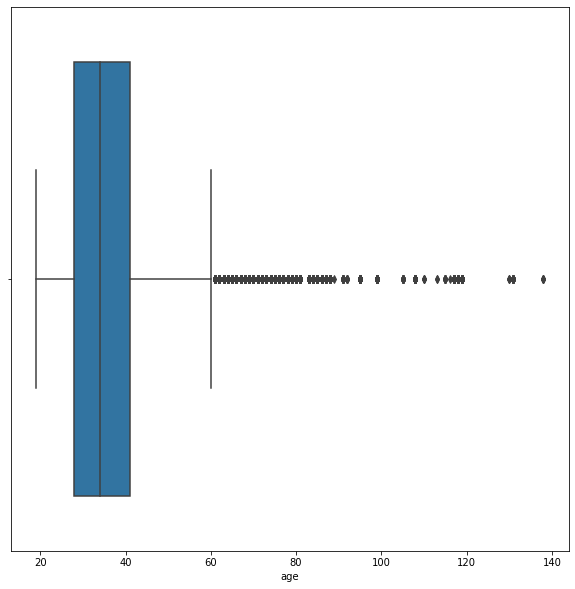

In [22]:
#check by boxplot if there is an outlier in the age of mambers
plt.figure(figsize=(10,10))
sns.boxplot(data=clean_df,x='age')

We found there is an outliers around 20 to 67 years

__Define__

    Removing the outliers age>60

__Code__

In [23]:
print('number of rows before cleaning :',clean_df.shape[0])
before_=clean_df.shape[0]
# note that filtering by query will remove null values
clean_df=clean_df.query('age<=60')


number of rows before cleaning : 1863721


#### Test

In [24]:
print('number of rows after cleaning :{:,}'.format(clean_df.shape[0]), ', And with diffrence around:{:,}'.format(before_-clean_df.shape[0]))


number of rows after cleaning :1,708,250 , And with diffrence around:155,471


### What is the structure of your dataset?

We have dataset of 1,863,721 row which include all informatio regarding rent bike process
    * bike start time, end time, duration
    * bike id
    * gender and user type
    * bike tage
    
And we include some intresting features from exciting one such as:
    * Age
    * Month
    * Hours
    * Minutes

### What is/are the main feature(s) of interest in your dataset?

The Main features that intest me which factors that couse high demand, so we can react to this business.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect that time series is the most features that will help us and location as well.

In [25]:
enhanced_dataset=clean_df.copy()
enhanced_dataset.to_csv('enhanced_dataset.csv',index=False)

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

Text(0.5, 1.0, 'Usage of Bike by Months')

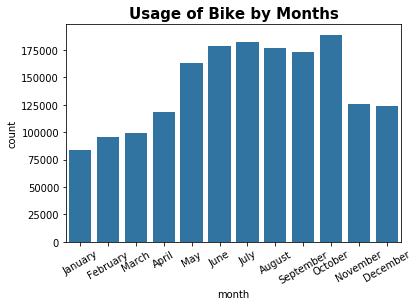

In [61]:

ordered_month=['January','February','March','April','May','June','July','August','September','October','November','December']

# Monthly sharing system
sns.countplot(data=clean_df,x='month',color=base_color,order=ordered_month)
plt.xticks(rotation=30)
plt.title('Usage of Bike by Months', fontsize=15, fontweight='semibold')

__Observation:__ Summer usualy there is high demand on bikes unlike winter which is weak.

Text(0.5, 1.0, 'Usage of Bike by Weekdays')

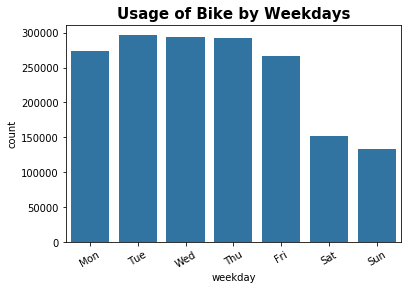

In [60]:
# which day of the week is high demand
ordered_weekday=['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
sns.countplot(data=clean_df,x='weekday',color=base_color,order=ordered_weekday)
plt.xticks(rotation=30)
plt.title('Usage of Bike by Weekdays', fontsize=15, fontweight='semibold')

__Observation:__ starting from monday the demand is increaing until Thusday friday still high but start to go down which lead to low demand on weekend Saturday  & Sunday 

Text(0.5, 1.0, 'Usage of Bike by Hours')

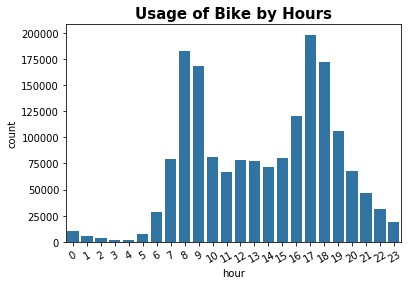

In [59]:
#Which time during the day we expect more demand to start a rent
sns.countplot(data=clean_df,x='hour',color=base_color)
plt.xticks(rotation=30)
plt.title('Usage of Bike by Hours', fontsize=15, fontweight='semibold')

__Observation:__ I notich there are two high demand waves during the day 8-9 am & 17-18 & between. It's look like working hours, so we can assume that working our has impact on 

Text(0.5, 1.0, 'Usage of Bike by Duration')

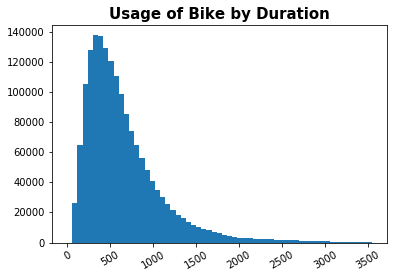

In [58]:
# usage time
bins=np.arange(0,3600,60)
plt.hist(data=clean_df,x='duration_sec',bins=bins)
plt.xticks(rotation=30)
plt.title('Usage of Bike by Duration',fontsize=15, fontweight='semibold')

__Observation:__ Summer usualy there is high demand on bikes unlike winter which is weak.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

I notice the following from above data visulization:
    1. People use bike to go work that is proven by day of week which show high demand in working day and also the time that has two waves one in the moring and the other in the evening
    2. usually peaople use it for short time to go work
    3. unusal usage duration which more that 24 hours

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

There is  unusal distribution for the member birth year, which dated before 1900. Since 95% of the members are between 17 and 57 years, I removed users older than 60.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

## Subscriber vs Customer

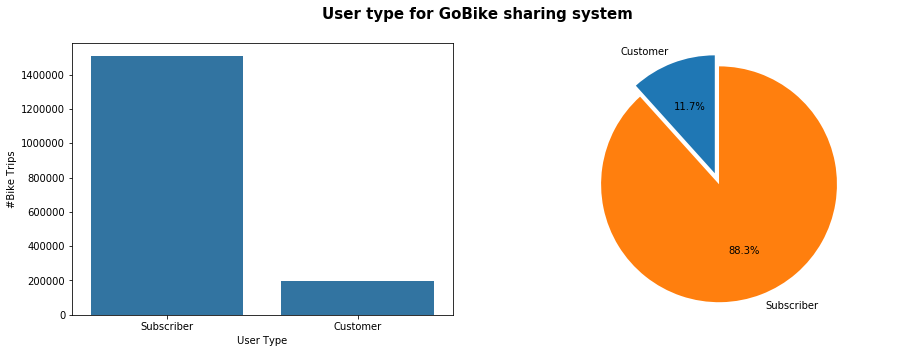

In [57]:
plt.figure(figsize = [15, 5])

plt.subplot(1,2,1)
sns.countplot(data=clean_df, x="user_type", order=clean_df.user_type.value_counts().index,color=base_color)
plt.xlabel('User Type')
plt.ylabel('#Bike Trips')


plt.subplot(1,2,2)
customer = clean_df.query('user_type == "Customer"')['bike_id'].count()
subscriber = clean_df.query('user_type == "Subscriber"')['bike_id'].count()

customer_proportion = customer / clean_df['bike_id'].count()
subscriber_proportion = subscriber / clean_df['bike_id'].count()

prop = [customer_proportion, subscriber_proportion]
plt.pie(prop, explode=(0, 0.1), labels=['Customer', 'Subscriber'],autopct='%1.1f%%', startangle=90)
plt.axis('equal')

plt.suptitle('User type for GoBike sharing system', fontsize=15, fontweight='semibold');

#### Most of our bike trips Contributed by Subscriber with (88.3 %)

## Subscriber vs Customer by Months



In [38]:
# let us create function for drawing count visulization
#

def countx(datax,timetype,user_type,labelx,massagex,order):
    g = sns.catplot(data=datax, x=timetype, col=user_type, kind='count', sharey = False,
            color = base_color,order=order)
    g.set_axis_labels(labelx, "#Bike Trips")
    g.set_xticklabels(rotation=60)
    g.set_titles("{col_name}")
    g.fig.suptitle(massagex, y=1.03, fontsize=20, fontweight='semibold');


#### Since we will use Compaiting Custmer vs Subscriber by months,weekdays, and hourly we create function to draw the conclusion as above.

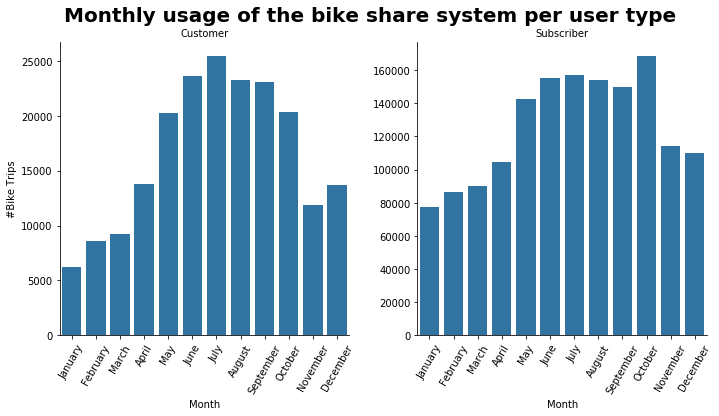

In [39]:
# monthly usege of the bike sharing system per user type
ordmonth=['January','February','March','April', 'May', 'June','July', 'August', 'September', 'October', 'November', 'December'  ]
countx(clean_df,'month',"user_type",'Month','Monthly usage of the bike share system per user type',ordmonth)



#### In general summer is the highest demand for bike trips  through the years, In the winter both are low but Custmer almost have number of subscriber. Becouse Subscriber usualy use it for transportation for the work.

## Subscriber vs Customer by Weekday

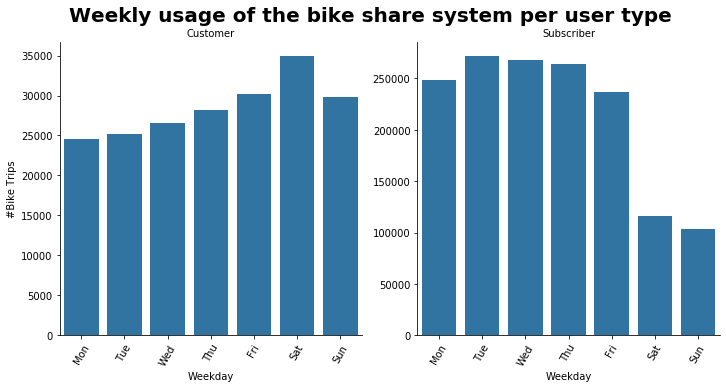

In [40]:

# weekday usege of the bike sharing system per user type
ordweekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
countx(clean_df,'weekday',"user_type",'Weekday','Weekly usage of the bike share system per user type',ordweekday)




#### As we see subscriber which usually rent bike during weekday ublike custmer that might rent it for wolking around in the weekend

## Subscriber vs Customer by Hours

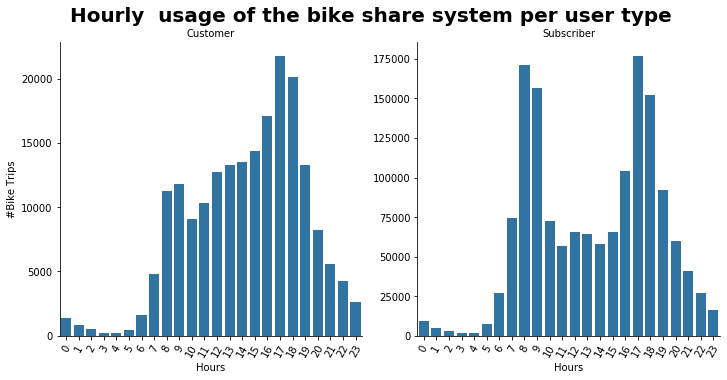

In [41]:
# hourly usege of the bike sharing system per user type

countx(clean_df,'hour',"user_type",'Hours','Hourly  usage of the bike share system per user type',np.arange(0,24))



#### Again subscriber which we considered workers has rush our in the morning and eveining, unlike custmer which is in the evening most of the time.

## Bike Trips by Gender

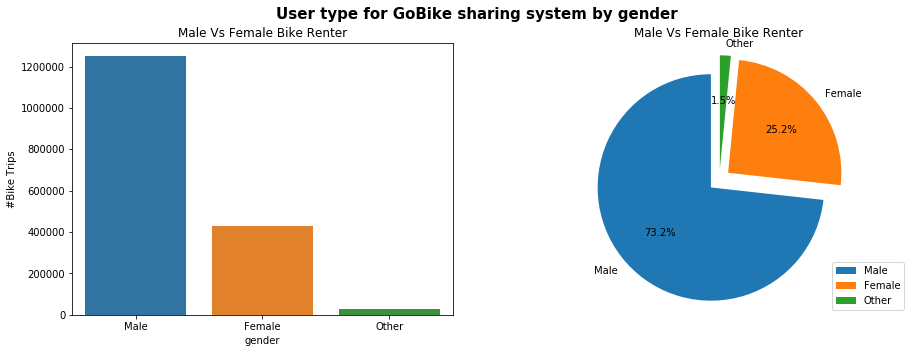

In [70]:
plt.figure(figsize = [15, 5])
plt.subplot(1,2,1)
sns.countplot(data=clean_df, x="gender", order=clean_df['gender'].value_counts().index)
plt.xlabel('gender')
plt.ylabel('#Bike Trips')
plt.title('Male Vs Female Bike Renter')


plt.subplot(1,2,2)
male = clean_df.query('gender == "Male"')['bike_id'].count()
female = clean_df.query('gender == "Female"')['bike_id'].count()
other = clean_df.query('gender == "Other"')['bike_id'].count()
plt.title('Male Vs Female Bike Renter')

male_proportion = male / clean_df['bike_id'].count()
female_proportion = female / clean_df['bike_id'].count()
other_proportion = other / clean_df['bike_id'].count()

prop = [male_proportion, female_proportion,other_proportion]
plt.pie(prop, explode=(0.1, 0.1,0.1), labels=['Male', 'Female','Other'],autopct='%1.1f%%', startangle=90)
plt.axis('equal');
plt.legend()

plt.suptitle('User type for GoBike sharing system by gender', fontsize=15, fontweight='semibold');

#### In general most of the bike renter are men with 73.2%

## Top Stations

Text(0, 0.5, '#Bike Trips')

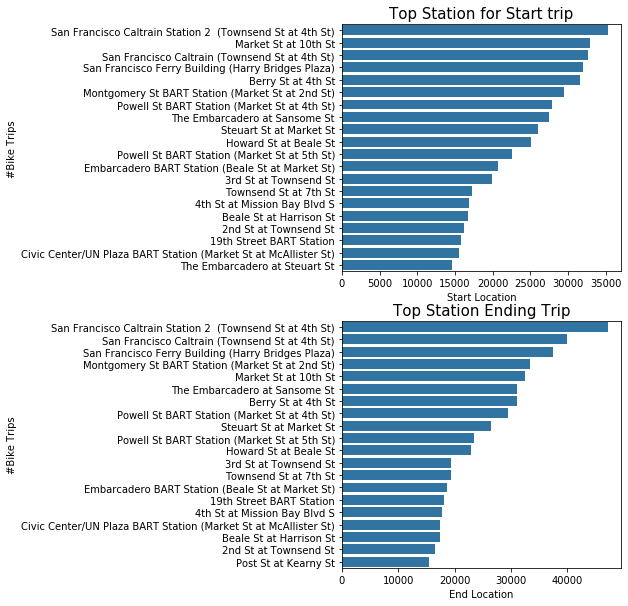

In [43]:
plt.figure(figsize = [5, 10])

plt.subplot(2,1,1)
plt.title('Top Station for Start trip',fontsize=15)
sns.countplot(data=clean_df, y="start_station_name",color=base_color, order=clean_df['start_station_name'].value_counts()[:20].index)
plt.xlabel('Start Location')
plt.ylabel('#Bike Trips')
plt.subplot(2,1,2)

sns.countplot(data=clean_df, y="end_station_name",color=base_color, order=clean_df['end_station_name'].value_counts()[:20].index)
plt.title('Top Station Ending Trip',fontsize=15)
plt.xlabel('End Location')
plt.ylabel('#Bike Trips')

#### The top station show which station is more important for the business, so we can take better decision either to improve week station or development more services in top ones

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


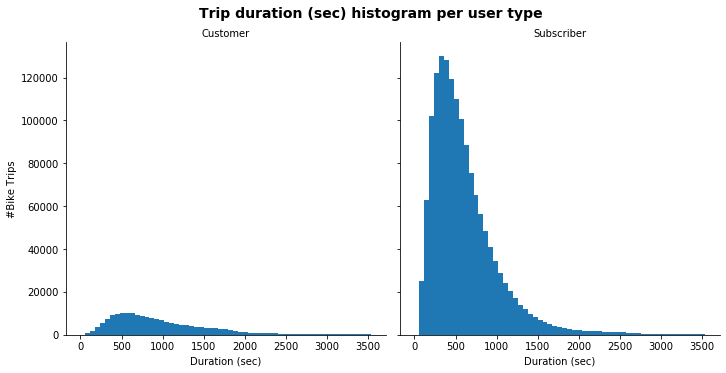

In [44]:
# code for the (histogram) duration (sec) distribution per user type

g = sns.FacetGrid(clean_df, col="user_type", margin_titles=True, size=5)
bin_edges = np.arange(0, 3600,60)
g.map(plt.hist, "duration_sec", color=base_color, bins=bin_edges)
g.set_axis_labels("Duration (sec)", "#Bike Trips")
g.set_titles(col_template = '{col_name}')
g.fig.suptitle('Trip duration (sec) histogram per user type', y=1.03, fontsize=14, fontweight='semibold');

#### San Francisco station 2 is the most active station in our dataset

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> User type is the main features that is intresting me. As we saw in the Previous visulizations we conclude that custmers usually casual renter who use bike for walking around in the weekend mainly summer time and between(4 pm - 7 pm) unlike Subscriber which use in maily during the weekday at working hour Round Trip between(8am - 9 am & 4,pm -7pm)

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> beside user type feature which subscriber and custmer we notice some other intrsting features such as gender that show 73.2% of rider is men rather than 25.2% were women and 1.5% were unknown. also, another intresting featrue was top stations list that we can investigate more to about it.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

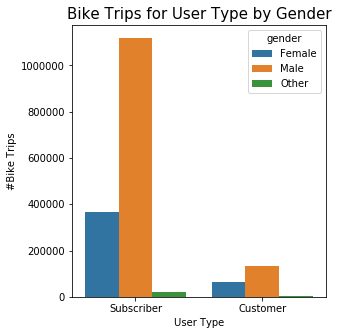

In [45]:
plt.figure(figsize = [10, 5])

# code for the bar chart
plt.subplot(1, 2, 1)

g = sns.countplot(data=clean_df, x="user_type", hue="gender", order=clean_df.user_type.value_counts().index)
g.set_title('Bike Trips for User Type by Gender',fontsize=15)
g.set_xlabel('User Type')
g.set_ylabel('#Bike Trips');

In [46]:
# let us create function for drawing count visulization by gender
#

def countgender(datax,timetype,user_type,labelx,massagex,order):
    g = sns.catplot(data=datax, x=timetype, hue="gender", col=user_type, kind='count', sharey = False,order=order)
    g.set_axis_labels(labelx, "#Bike Trips")
    g.set_xticklabels(rotation=60)
    g.set_titles("{col_name}")
    g.fig.suptitle(massagex, y=1.03, fontsize=20, fontweight='semibold');

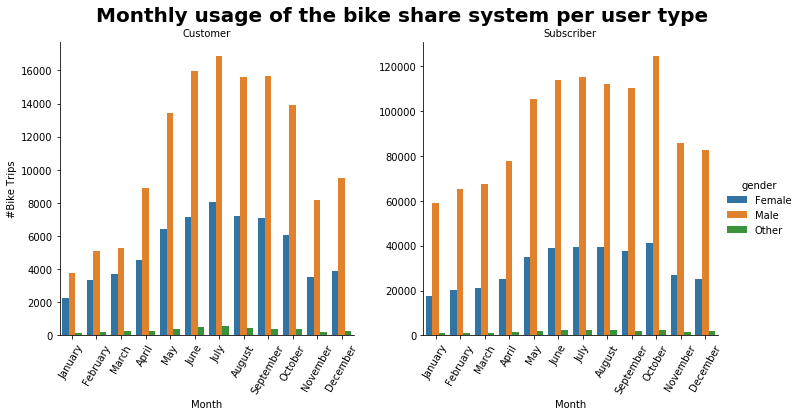

In [47]:
# monthly usege of the bike sharing system per user type
ordmonth=['January','February','March','April', 'May', 'June','July', 'August', 'September', 'October', 'November', 'December'  ]
countgender(clean_df,'month',"user_type",'Month','Monthly usage of the bike share system per user type',ordmonth);


#### For both Custmers and Subscriber both reach peak in summer from may until october. but what is intersting is the custmer during Jan-Mar the demand is very decresed in male but increased a little bit for female.

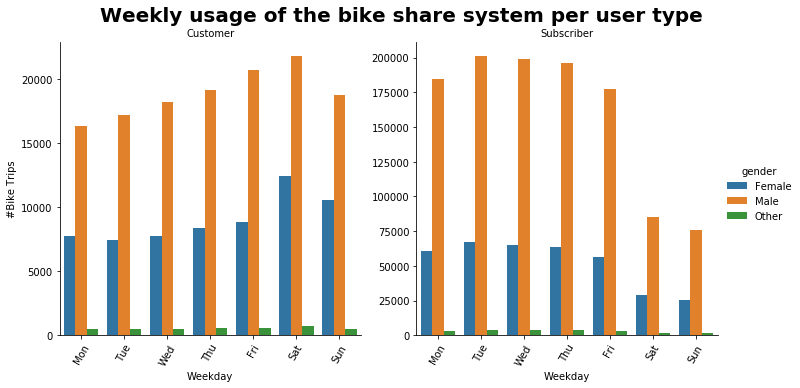

In [48]:
# weekday usege of the bike sharing system per user type
ordweekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
countgender(clean_df,'weekday',"user_type",'Weekday','Weekly usage of the bike share system per user type',ordweekday);

#### Subscriber in the peak during the weekday and low in the weekend for male and female. Unlike customers tend to increased in the weekend.

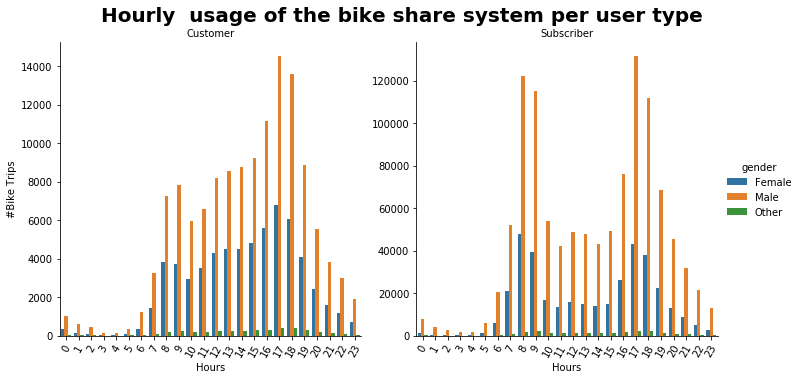

In [49]:
# hourly usege of the bike sharing system per user type

countgender(clean_df,'hour',"user_type",'Hours','Hourly  usage of the bike share system per user type',np.arange(0,24));


### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Male in general used bike to move from thier home to work unlike women who not preferred to used bike to get to work. also,Again Subsciber tend to rent bike becouse transportation between hoem and workplace reaching peak during weekday msunner and early hour in the morning(8am-9am) and (4pm-7pm). Customers usualy rent on summer time during weekend for fun usualy between (4pm-6pm)

### Were there any interesting or surprising interactions between features?

> The surprising interactions that Women like to rent bike on winter as customers between Jan-Mar.

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!